## Загрузка данных

In [1]:
# загружаем библиотеки
import pandas as pd
import datetime as dt
import math
import numpy as np

import scipy.stats as stats
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# задаем формат таблиц
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 150 

In [3]:
# загружаем датасеты
try:
    hypothesis = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/7. Принятие решений в бизнесе/data/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

try:
    orders = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/7. Принятие решений в бизнесе/data/orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')

try:
    visitors = pd.read_csv(
        'c:/Users/Nior/yandex.practicum_DA/educational_projects/7. Принятие решений в бизнесе/data/visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')





In [4]:
# фунция для получения общей информации о датасетах
def get_info(df, df_name):
    print(f'Общая информация о таблице - {df_name}')
    display(df.head()) # выводим "голову" таблицы
    print(df.info() , '\n') # общую информацию
    print(df.columns, '\n') # названия столбцов
    print(df.describe(),'\n') # числовое описание
    print(f'Количество NaN значений в таблице - {df_name}', '\n') 
    print(df.isna().sum()) # количество пропусков
    print(f'Число дубликатов в таблице - {df_name}', '\n') 
    print(df.duplicated().sum()) # количество дубликатов

In [5]:
# изучаем таблицу гипотез
get_info(hypothesis, 'hypothesis')

Общая информация о таблице - hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None 

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object') 

       Reach  Impact  Confidence  Efforts
count   9.00    9.00        9.00     9.00
mean    4.78    4.78        5.56     4.89
std     3.15    3.19        3.05     2.80
min     1.00    1.00        1.00     1.00
25%     3.00    3.00        3.00     3.00
50%     3.00    3.00        7.00     5.00
75%     8.00    7.00        8.00     6.00
max    10.00   10.00        9.00    10.00 

Количество NaN значений в таблице - hypothesis 

Hypothesis    0
Reach         0
Impact       

В таблице 5 столбцов:
* `object` - 1 столбец
* `int64` - 4 столбца

*В названиях столбцов смешаный регистр.*

Согласно документации к данным:
* Hypothesis — краткое описание гипотезы; 
* Reach — охват пользователей по 10-балльной шкале; 
* Impact — влияние на пользователей по 10-балльной шкале; 
* Confidence — уверенность в гипотезе по 10-балльной шкале; 
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица содержит 9 строк, не имеет пропусков и дубликатов.

In [6]:
# изучаем таблицу заказов
get_info(orders, 'orders')

Общая информация о таблице - orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object') 

         transactionId        visitorId      revenue
count         1,197.00         1,197.00     1,197.00
mean  2,155,621,385.53 2,165,960,143.10     8,348.01
std   1,229,084,904.76 1,236,014,192.15    39,191.13
min       1,062,393.00     5,114,589.00        50.00
25%   1,166,775,572.00 1,111,826,046.00     1,220.00
50%   2,145,193,898.00 2,217,984,702.00     2,978.00
75%   3,237,740,112.00 3,177,606,451.00     8,290.00
max   4,293,855,558.00 4,28

In [7]:
# проверим могут ли быть пользователи в двух группах одновременно
print('Количество пользователей, которые есть в обоих группах: ',len(orders.groupby('visitorId').agg(
    {'group':'nunique'}
).query('group > 1')))
print('Всего уникальных пользователей: ', orders['visitorId'].nunique())

Количество пользователей, которые есть в обоих группах:  58
Всего уникальных пользователей:  1031


В таблице 5 столбцов:
* `int64` - 3 столбца
* `object` - 2 столбца

*Смешаный регистр в названиях столбцов, дата в формате object.*

Согласно документации к данным:
* transactionId — идентификатор заказа; 
* visitorId — идентификатор пользователя, совершившего заказ; 
* date — дата, когда был совершён заказ; 
* revenue — выручка заказа; group — группа A/B-теста, в которую попал заказ.

Таблица содержит 1197 строк, пропуски отсутствуют. Обнаружены неявные дубликаты 58 строк из пользователей, попавших в 2 группы, что составляет 5,63% от количества уникальных пользователей. Большой значимости они не несут, но удаление может нарушить связь с visitors. *Спросить у коллег как так вышло.*

In [8]:
# изучаем таблицу посетителей
get_info(visitors, 'visitors')

Общая информация о таблице - visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 

Index(['date', 'group', 'visitors'], dtype='object') 

       visitors
count     62.00
mean     607.29
std      114.40
min      361.00
25%      534.00
50%      624.50
75%      710.50
max      770.00 

Количество NaN значений в таблице - visitors 

date        0
group       0
visitors    0
dtype: int64
Число дубликатов в таблице - visitors 

0


В таблице 3 столбца:
* `int64` - 1 столбца
* `object` - 2 столбца

*Дата в формате object.*

Согласно документации к данным:
* date — дата; 
* group — группа A/B-теста; 
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Таблица содержит 62 строки, дубликаты и пропуски отсутствуют.

## Предобработка данных

In [9]:
# поправим названия колонок в таблице гипотез
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [10]:
# поправим названия колонок в таблице заказов
orders.columns = [x.lower().replace('id', '_id') for x in orders.columns]
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# исправляем даты
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# проверяем формат в заказах
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
# проверяем формат в посетителях
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Выводы о предобратотке данных

* изучили данные датасетов

* обнаружили и иправили следующие проблемы: смешаный регистр в названиях столбцов, дата в формате object, неявные дубликаты 5%

* пропуски в таблицах отсутствуют

## Приоритизация гипотез

### Фреймворк ICE для приоритизации гипотез. 

In [13]:
# считаем ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [14]:
# отсортируем их по убыванию приоритета
hypothesis_ice = hypothesis.sort_values('ICE', ascending=False)
hypothesis_ice

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


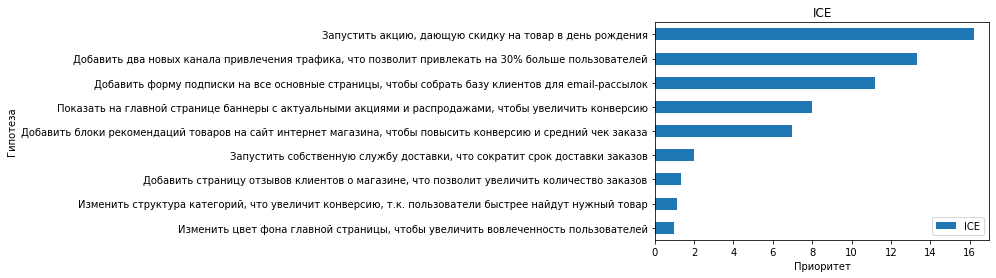

In [15]:
# смотрим приоритеты на графике
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

По методу ICE самыми перспективными гипотезами явлются 8, 0 и 7, самой бесперспективной 4.

### Фреймворк RICE для приоритизации гипотез. 

In [16]:
# считаем RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [17]:
# отсортируем их по убыванию приоритета
hypothesis_rice = hypothesis.sort_values(by='RICE',ascending=False)
hypothesis_rice

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


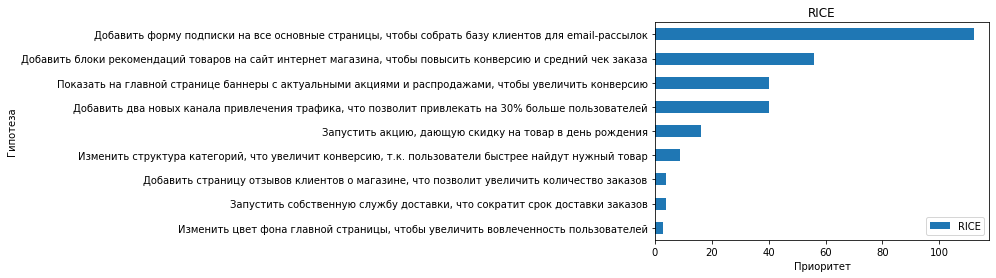

In [18]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

По методу RICE самыми перспективными гипотезами явлются 7, 2 и 0, самой бесперспективной 4.

### Сравним RICE и ICE

In [19]:
# нарисуем таблицу для оценки изменений
results = [
    [8, 7],
    [0, 2],
    [7, 0],
    [6, 6],
    [2, 8],
    [1, 3],
    [5, 1],
    [3, 5],
    [4, 4]
]
lists = ['Нумерация ICE', 'Нумерация RICE']

ice_rice = pd.DataFrame(data=results , columns=lists) # создаём таблицу и сохраняем её в переменную world_map
ice_rice

,Нумерация ICE,Нумерация RICE
0,8,7
1,0,2
2,7,0
3,6,6
4,2,8
5,1,3
6,5,1
7,3,5
8,4,4


Видим, что у RICE и ICE разная приоретизация. Так вышло потому метод RICE учитывает охват аудитории, а ICE нет. 

RICE предлагает "набирать массу" гипотезами: 
- добавить форму подписки на все основные станицы сайта, 
- добавить блоки рекомендаций, 
- показывать баннеры с акциями.

Тем не менее и ICE, и RICE определяют 7 и 0 перспективными, а 4 бесперспективной. Гипотеза 8 "скидка в день рождения", в ICE была самой перспективной, а в RICE опустилась на 5ю позицию, поскольку имеет самый маленький охват аудитории 1/10. 

## Анализируем A/B-тест

Чтобы построить графики, необходимо подготовить данные. Выше мы сделали предобработку датасетов, сейчас нужно собрать кумулятивные данные. 

In [20]:
# проверяем количество групп в А/В тесте
orders['group'].unique()

array(['B', 'A'], dtype=object)

В тесте участвуют 2 группы А и В

In [21]:
# смотрим сколько у нас пользователей в кадой группе
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Проверяем гипотезу о равенстве среднего количества пользователей в каждой паре датасетов. Помним, что в датасете orders - 1197 уникальных позиций. Соответственно делим набор данных на две части (в зависимости от группы) и проверяем гипотезу по столбцам.

* **Н0** Среднее количество пользователей в группе А и В не различаются
* **Н1** Среднее количество пользователей в группе А и В различаются

Отмечу также, что проверять столбцы transaction_id, visitors_id и date не имеет смысла поскольку они не несут информации о выручке заказа.

In [22]:
# выделим группы
group_a = orders.query('group == "A"')
group_b = orders.query('group == "B"')

alpha = 0.05  # критический уровень статистической значимости

# проверим t-тестом
result = st.ttest_ind(group_a['revenue'], group_b['revenue'])

print('p-значение для сравнения групп А и B: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')
    
print('Относительное различие в выручке между группами : {0:.3f}'.format(
    group_b['revenue'].mean()/group_a['revenue'].mean()-1))

p-значение для сравнения групп А и B:  0.403693443754076
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B
Относительное различие в выручке между группами : 0.259


In [23]:
# проверим непараметрическим тестом
results = st.mannwhitneyu(group_a['revenue'], group_b['revenue'], True, 'less') # ваш код

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Наблюдаемые данные не подтверждают наличие разницы. Нельзя сказать, что группа В отличается от группы А по выручке

In [24]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

In [25]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']\
                            , orders['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'transaction_id' : 'nunique', 
    'visitor_id' : 'nunique', 
    'revenue' : 'sum'
}), axis=1).sort_values(by=['date','group'])

In [26]:
# получаем агрегированные кумулятивные данные по дням о посетителях
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']\
                            , visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'})\
                            , axis=1).sort_values(by=['date','group'])

In [27]:
# собираем в одну таблицу и даем понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Получили датафрейм cumulative_data со столбцами:

* `date` — дата;
* `group` — группа A/B-теста;
* `orders` — кумулятивное число заказов на указанную дату в указанной группе;
* `buyers` — кумулятивное число пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

### График кумулятивной выручки по группам. 

Text(0, 0.5, 'Выручка')

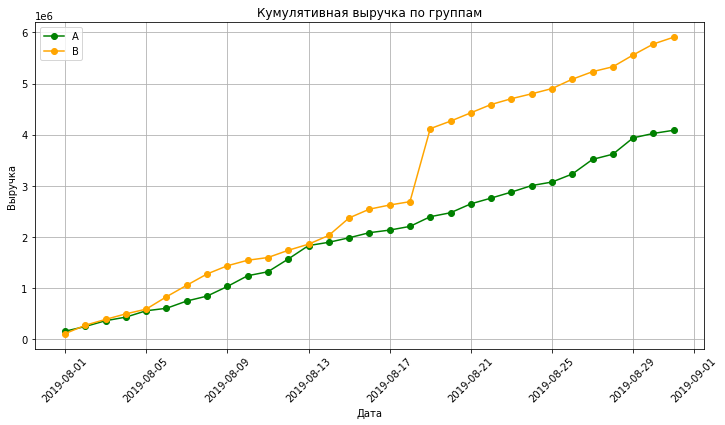

In [28]:
# кумулятивное количество заказов и выручки по дням в группе А и В
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(12, 6)) # размер графика
plt.grid() # сетка
plt.title('Кумулятивная выручка по группам') # имя графика

plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'], 
         label = 'A', 
         color='green', 
         marker='o') # выручка гр.А
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'], 
         label = 'B', 
         color='orange', 
         marker='o') # выручка гр.В

plt.legend() # подпишем группы на графике
plt.xticks(rotation=45) # повернем даты на оси х, чтобы лучше читались
plt.xlabel('Дата') # подпись оси х
plt.ylabel('Выручка') # подпись оси у

Из графика видим: тест проводился в течение календарного месяца - августа 2019. Кумулятивная выручка по дням в обеих группах плавно растет до 18 августа, группа В показывает немного лучшие результаты. 19 августа в группе происходит резкий скачок, после чего график стабилизируется и продолжает плавный рост до конца месяца. Стоит уточнить, была ли это одна крупная покупка или всплеск роста числа заказов.

### График кумулятивного среднего чека по группам. 

Text(0, 0.5, 'Средний чек')

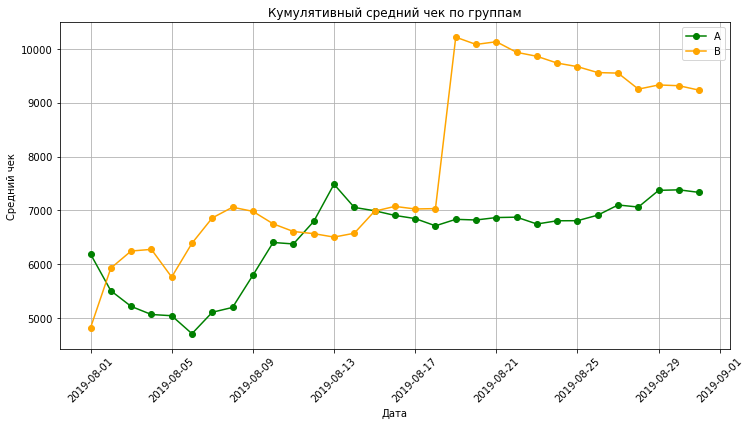

In [29]:
# построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Кумулятивный средний чек по группам')

plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
         label='A', 
         color='green', 
         marker='o')
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
         label='B', 
         color='orange', 
         marker='o')

plt.legend() 
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')

Средний чек в начале месяца скачет в обеих группах. 15 августа он устанавливается на отметке около 7000. После чего 19 августа в группе В происходит скачок и далее средний чек в группе В плавно падает. В группе А до 27 августа держится на отметке до 7000, дальше плавно растет. Все еще есть вероятность крупных покупок 19 августа в группе В.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

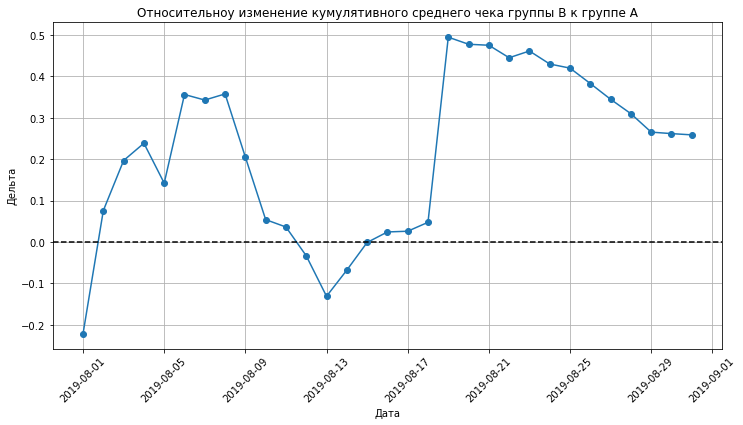

In [30]:
# собираем данные в одном датафрейме
merged_cr = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Относительноу изменение кумулятивного среднего чека группы B к группе A')
plt.plot(
    merged_cr['date'], 
    (merged_cr['revenue_b']/merged_cr['orders_b'])/(merged_cr['revenue_a']/merged_cr['orders_a'])-1,
    marker='o')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Дельта')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

График относительного изменения кумулятивного среднего чека сильно колеблется из-за выбросов. Видим несколько скачков 6 августа, 19 августа, возможно аномалию стоит поискать раньше, чем 18 августа.

### График кумулятивной конверсии по группам. 

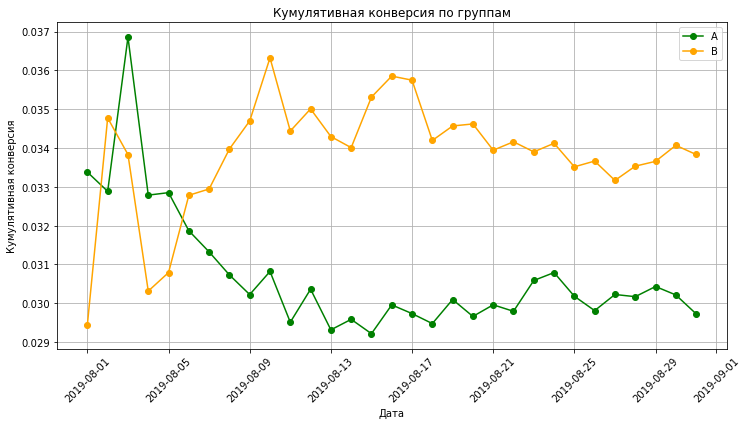

In [31]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cum_data = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cum_datb = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Кумулятивная конверсия по группам')
plt.plot(cum_data['date'], 
         cum_data['conversion'], 
         label='A', 
         color='green', 
         marker='o')
plt.plot(cum_datb['date'], 
         cum_datb['conversion'], 
         label='B',
         color='orange', 
         marker='o')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.legend()

Вначале графики колебались, но в итоге выровнялись и зафиксировались на примерно одном расстоянии друг от друга. График конверсии не показывает аномалий, поскольку не учитывает сумму покупок, а только их количество. Видимо дело все же в аномально больших покупках. 

### График относительного изменения кумулятивной конверсии группы B к группе A. 

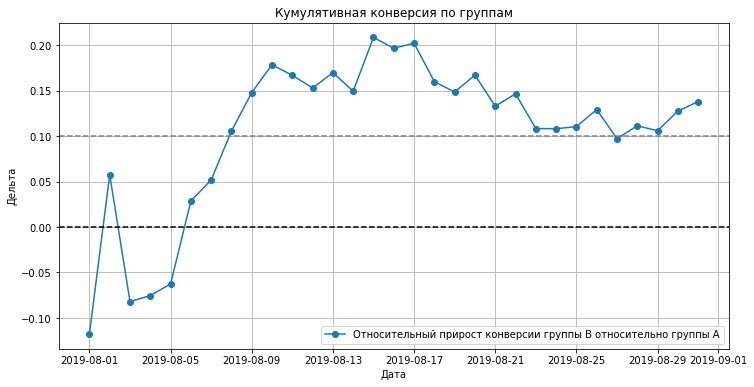

In [32]:
# собираем данные в одном датафрейме
merged_сс = cum_data[['date','conversion']].merge(
    cum_datb[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# строим графики
plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Кумулятивная конверсия по группам')
plt.plot( merged_сс['date'], 
    merged_сс['conversion_b']/merged_сс['conversion_a']-1, 
    label="Относительный прирост конверсии группы B относительно группы A", 
    marker = 'o')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Дельта')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

C 9 августа группа Б лидирует по конверсии, достигая 20% в середине исследуемого периода (14 августа). Среднее число конверсии группы В около 10%.

In [33]:
# соберем таблицу с пользователями и количеством из заказов
users_orders = (orders.groupby('visitor_id', as_index = False)
                          .agg({'transaction_id': pd.Series.nunique}))

users_orders.columns = ['user_id', 'orders']
users_orders.head()
print('В среднем пользователи совершают:', round(users_orders['orders'].mean(),2), 'покупок')

В среднем пользователи совершают: 1.16 покупок


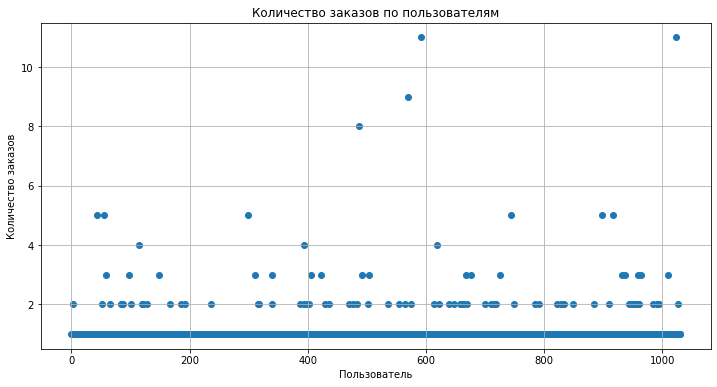

In [34]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Количество заказов по пользователям')
x_values = pd.Series(range(0,len(users_orders['orders'])))
plt.scatter(x_values, users_orders['orders'])
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

Видим, что основная масса пользователей делает 1 заказ, есть пользователи, совершающие 2 покупки, редко 3. 4 человека сделали больше 8 покупок.

### Выберем границу для определения аномальных пользователей.

In [35]:
print('95 перцентиль: %.2f' % (np.percentile(users_orders['orders'], [95])))
print('98 перцентиль: %.2f' % (np.percentile(users_orders['orders'], [98])))
print('99 перцентиль: %.2f' % (np.percentile(users_orders['orders'], [99])))
anomal_orders = (np.percentile(users_orders['orders'], [98])).astype('int')
print('Граница отсечения аномалий', anomal_orders)

95 перцентиль: 2.00
98 перцентиль: 3.00
99 перцентиль: 4.00
Граница отсечения аномалий [3]


Не более 5% пользователей оформили больше чем 2 заказа, не более 1% пользователей обормили более четрыех заказов. 2 заказа в неделю не выглядят сверхъестественными. Возьмем 98 перцентиль как границу для отсечения аномалий, так мы применим минимальные изменения к выборке.

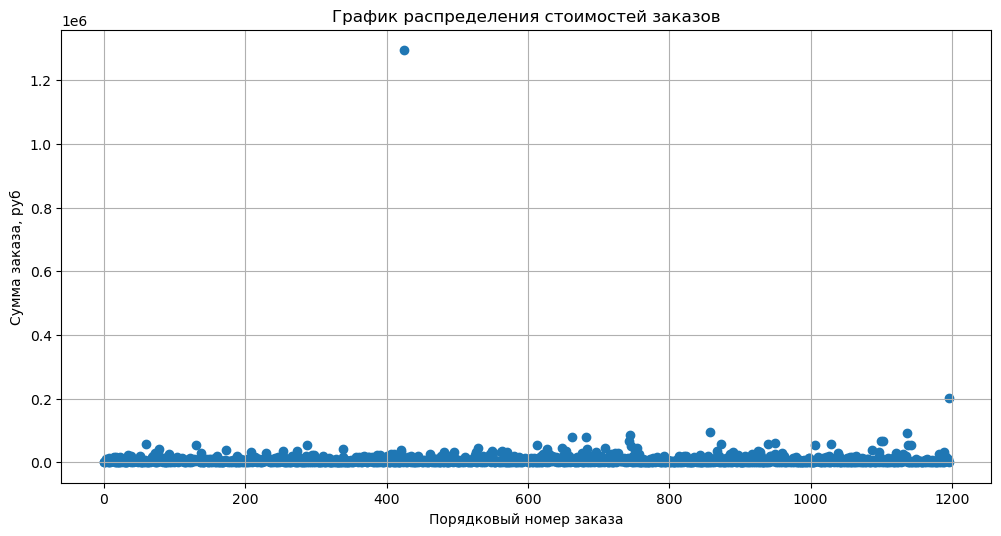

In [36]:
# строим график распределения стоимостей заказов

order_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12,6), dpi=100)
plt.grid()
plt.title('График распределения стоимостей заказов')
plt.scatter(order_values, orders['revenue'])
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Сумма заказа, руб')
plt.show()

Видим на графике практически гладкое "море заказов" и 2 выброса, один на уровне 200000, другой выше миллиона.

In [37]:
# посмотрим на самы большие заказы
orders.sort_values(by='revenue', ascending=False).head(5)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Таблица показывает нам огромный заказ под номером 425 в группе В и 1196, который не так велик, но так же значителен, и тоже в группе В.

### Выберем границу для определения аномальных заказов.

In [38]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))
anomal_revenue = (np.percentile(orders['revenue'], [95])).astype('int')
print('Граница отсечения аномалий', anomal_revenue)

95 перцентиль: 28000.00
99 перцентиль: 58233.20
Граница отсечения аномалий [28000]


Не более 5% пользователей совершили покупки более 28000 и не более 1% купили больше, чем на 58233.

### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [39]:
# подготовим данные
# посетители по дням и кумулятивные для группы А
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_date_a']

visitors_a_cum = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cum.columns = ['date', 'visitors_cum_a']

In [40]:
# посетители по дням и накопительные для группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_date_b']

visitors_b_cum = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cum.columns = ['date', 'visitors_cum_b']

In [41]:
# заказы по дням и кумулятивные для группы А
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_date_a', 'revenue_date_a']

orders_a_cum = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_date_a': 'sum', 'revenue_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cum.columns = [
    'date',
    'orders_a_cum',
    'revenue_a_cum',
]

In [42]:
# заказы по дням и кумулятивные для группы А
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_date_b', 'revenue_date_b']

orders_b_cum = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_date_b': 'sum', 'revenue_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cum.columns = [
    'date',
    'orders_b_cum',
    'revenue_b_cum',
]

In [43]:
# собираем все в одну таблицу
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cum, left_on='date', right_on='date', how='left')
    .merge(orders_b_cum, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cum, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cum, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_date_a,revenue_date_a,orders_date_b,revenue_date_b,orders_a_cum,revenue_a_cum,orders_b_cum,revenue_b_cum,visitors_date_a,visitors_date_b,visitors_cum_a,visitors_cum_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Получили таблицу со столбцами:

* `date` — дата;
* `orders_date_a` — количество заказов в выбранную дату в группе A;
* `revenue_date_a` — суммарная выручка в выбранную дату в группе A;
* `orders_date_b` — количество заказов в выбранную дату в группе B;
* `revenue_date_b` — суммарная выручка в выбранную дату в группе B;
* `orders_a_cum` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenue_a_cum` — суммарная выручка до выбранной даты включительно в группе A;
* `orders_b_cum` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenue_b_cum` — суммарная выручка до выбранной даты включительно в группе B;
* `visitors_date_а` — количество пользователей в выбранную дату в группе A;
* `visitors_date_b` — количество пользователей в выбранную дату в группе B;
* `visitors_a_cum` — количество пользователей до выбранной даты включительно в группе A;
* `visitors_b_cum` — количество пользователей до выбранной даты включительно в группе B.

In [44]:
# cоздадим переменные для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
orders_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_a.columns = ['user_id', 'orders']

orders_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_b.columns = ['user_id', 'orders'] 

In [45]:
# объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов 
sample_a = pd.concat(
    [
        orders_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_date_a'].sum() - len(orders_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_date_b'].sum() - len(orders_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

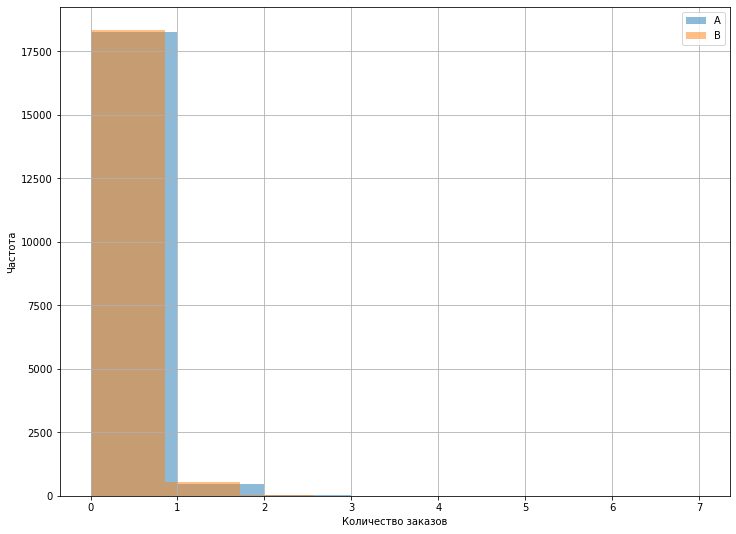

In [46]:
# посмотрим на получившиеся распределения
sample_a.hist(bins=sample_a.nunique(), figsize=(12, 9), alpha=0.5, label='A')
sample_b.hist(bins=sample_a.nunique(), figsize=(12, 9), alpha=0.5, label='B')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.legend()
plt.show()

Распределения не нормальны.

**Конверсия**

**H0**: Значимых различий в конверсии группы А и группы В нет

**H1**: Конверсия группы А и группы В значимо различается

**Уровень значимости** - 0.05

Для проверки будем использовать непараметрический тест **Уилкоксона-Манна-Уитни**

In [47]:
print('Статистическая значимость различий в конверсии между группами по «сырым» данным: {0:.3f}'.format
      (stats.mannwhitneyu(sample_a,sample_b, alternative="two-sided")[1]))

alpha = 0.05  # критический уровень статистической значимости

results = stats.mannwhitneyu(sample_a,sample_b, alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

print('Относительное различие в конверсии между группами : {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))

Статистическая значимость различий в конверсии между группами по «сырым» данным: 0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие в конверсии между группами : 0.138


Вывод: По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.016 меньше 0.05. Нулевую гипотезу отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Средний чек**

**H0**: Значимых различий в среднем чеке группы А и группы B нет

**H1**: Средний чек значимо различается

Уровень значимости - 0.05

Для проверки будем использовать непараметрический тест **Уилкоксона-Манна-Уитни**

In [48]:
print('Cтатистическая значимость различий в среднем чеке между группами по «сырым» данным: {0:.3f}'.format(
    stats.mannwhitneyu(
        orders[orders['group']=='A']['revenue'], 
        orders[orders['group']=='B']['revenue'], 
        alternative="two-sided")[1]))

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                             orders[orders['group']=='B']['revenue'],
                             alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

print('Относительные различия в среднем чеке между группами: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Cтатистическая значимость различий в среднем чеке между группами по «сырым» данным: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные различия в среднем чеке между группами: 0.259


In [49]:
print('Средний чек по сырым данным в группе А: {0:.2f}'.format (orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек по сырым данным в группе B: {0:.2f}'.format (orders[orders['group']=='B']['revenue'].mean()))

Средний чек по сырым данным в группе А: 7333.58
Средний чек по сырым данным в группе B: 9230.88


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A на 25%.

Напомним, что найденные выше 95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — users_many_orders и пользователей, совершивших заказы дороже 20 000 — users_expensive_orders. Объединим их в таблице anomal_users.

### Cчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [50]:
users_many_orders = pd.concat(
    [
        orders_users_a[orders_users_a['orders'] > anomal_orders[0]]['user_id'],
        orders_users_b[orders_users_b['orders'] > anomal_orders[0]]['user_id'],
    ],
    axis=0,
)
users_expensive_orders = orders[orders['revenue'] > anomal_revenue[0]]['visitor_id']
anomal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(anomal_users.shape)

(63,)


Всего 63 аномальных пользователя.

In [51]:
# считаем конверсию без аномалий
sample_a_filtered = pd.concat(
    [
        orders_users_a[
            np.logical_not(orders_users_a['user_id'].isin(anomal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_date_a'].sum() - len(orders_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_users_b[
            np.logical_not(orders_users_b['user_id'].isin(anomal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_date_b'].sum() - len(orders_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Конверсия**

**H0**: Значимых различий в конверсии нет

**H1**: Конверсия значимо различается

Уровень значимости - 0.05

In [52]:
print('Статистическая значимость различий в конверсии между группами по «очищенным» данным: {0:.3f}'.format(
    stats.mannwhitneyu(sample_a_filtered,sample_b_filtered, alternative="two-sided")[1]))

results = stats.mannwhitneyu(sample_a_filtered,sample_b_filtered, alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    

print('Относительное различие в конверсии между группами : {0:.3f}'.format(
    sample_b_filtered.mean()/sample_a_filtered.mean()-1))

Статистическая значимость различий в конверсии между группами по «очищенным» данным: 0.018
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие в конверсии между группами : 0.148


По очищенным данным сохраняются различия в конверсии: 
* p-value 0.017 - по сырым, 
* p-value 0.018 - по очищенным.

Относительная разница выросла с 13.8% до 14.8%. 

Можно с большой уверенностью говорить о том, что в группе В лучше конверсия. **Отвергаем** нулевую гипотезу, разница статистичесски значима.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [53]:
# считаем средний чек без аномалий
sample_a_filt_rev = orders[np.logical_and(orders['group']=='A',
                            np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue']

sample_b_filt_rev = orders[np.logical_and(orders['group']=='B',
                            np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue']

print('Статистическая значимость различий в среднем чеке между группами по «очищенным» данным: {0:.3f}'.format(
    stats.mannwhitneyu(
        sample_a_filt_rev, 
        sample_b_filt_rev, 
        alternative="two-sided")[1]))

results = stats.mannwhitneyu(sample_a_filt_rev, sample_b_filt_rev, alternative="two-sided")[1]

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

print('Относительные различия в среднем чеке между группами: {0:.3f}'.format(
    sample_a_filt_rev.mean()/sample_b_filt_rev.mean()-1))

Статистическая значимость различий в среднем чеке между группами по «очищенным» данным: 0.977
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительные различия в среднем чеке между группами: 0.017


In [54]:
print('Средний чек по сырым данным в группе А: {0:.2f}'.format (orders[np.logical_and(orders['group']=='A',
                            np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'].mean()))
print('Средний чек по сырым данным в группе B: {0:.2f}'.format (orders[np.logical_and(orders['group']=='B',
                            np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'].mean()))

Средний чек по сырым данным в группе А: 5192.07
Средний чек по сырым данным в группе B: 5104.89


P-value вырос с 0.729 до 0.977, а вот относительные различия снизились с 0.259 до 0.017, следовательно мы **не отвергаем** нулевую гипотезу. Заодно снизился и средний чек, кстати, в группе В теперь он ниже, чем в А.

### Принимаем решение по результатам теста.

In [55]:
# считаем кумулятивную конверсию по очищенным данным
#отсекаем аномальных пользователей
orders_normal = orders.query('visitor_id not in @anomal_users')
orders_filtered = dates_groups.apply(
    lambda x: orders_normal[np.logical_and(
        orders_normal['date'] <= x['date'], 
        orders_normal['group'] == x['group']
    )]\
                                    .agg(
        {'date':'max', 
         'group':'max', 
         'transaction_id':pd.Series.nunique, 
         'visitor_id':pd.Series.nunique, 
         'revenue':'sum'}), axis=1
)\
                                    .sort_values(
    by=['date','group']
                                                )
# собираем очищенный накопитель заказов
cum_data_filt = orders_filtered.merge(visitors_aggregated, left_on=['date', 'group'], \
                                                            right_on=['date', 'group'])
cum_data_filt.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_data_filt['conversion'] = cum_data_filt['orders']/cum_data_filt['visitors']

# делим по дням в группе А
cum_rev_a_filt = cum_data_filt[cum_data_filt['group']=='A'][['date','revenue', 'orders', 'conversion']]

# делим по дням в группе B
cum_rev_b_filt = cum_data_filt[cum_data_filt['group']=='B'][['date','revenue', 'orders', 'conversion']]

# собираем данные в одном датафрейме
merged_сum_rev_filt = cum_rev_a_filt.merge(cum_rev_b_filt, left_on='date'\
                                                       , right_on='date', how='left', suffixes=['_a', '_b'])

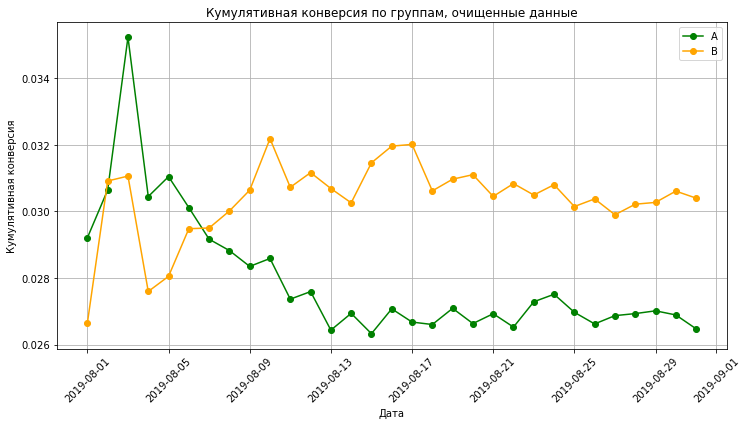

In [56]:
# строим графики
plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Кумулятивная конверсия по группам, очищенные данные')
plt.plot(cum_rev_a_filt['date'], 
         cum_rev_a_filt['conversion'], 
         label='A', 
         color='green', 
         marker='o')
plt.plot(cum_rev_b_filt['date'], 
         cum_rev_b_filt['conversion'], 
         label='B',
         color='orange', 
         marker='o')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.legend()

Видим, что на "очищенных" данных конверсия снизилась. По "сырым" данным к концу исследуемого периода кумулятивная конверсия в группе Б держалась на уровне 34%, на "очищенных" не доходит до 31%.

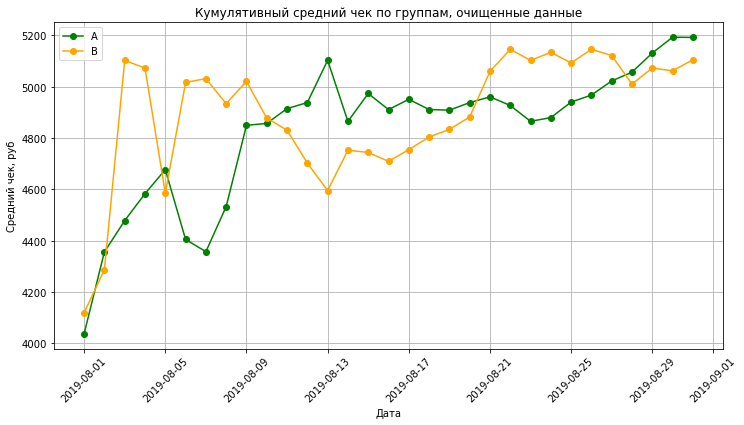

In [57]:
# cтроим отношение средних чеков
plt.figure(figsize=(12,6))
plt.grid()
plt.title('Кумулятивный средний чек по группам, очищенные данные')
plt.plot(cum_rev_a_filt['date'], 
         cum_rev_a_filt['revenue']/cum_rev_a_filt['orders'], 
         label = 'A',
         color='green', 
         marker='o')
plt.plot(cum_rev_b_filt['date'], 
         cum_rev_b_filt['revenue']/cum_rev_b_filt['orders'], 
         label = 'B',
         color='orange', 
         marker='o')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб')
plt.show()

Графики остаются нестабльными, в конце исследуемого периода группа А вышла в лидеры по среднему чеку. 

Найдем минимальную длительность теста для определения относительного различия между группами теста в 2% при условиях: 
* базовая конверсия 30%, - кумулятивная конверсия на ощищенных данных в группе В не доходит до 31%
* групп (вариаций) 2, 
* пользователей в день в среднем 31, 
* из них в тесте участвует каждый второй.

Будем использовать калькулятор расчёта длительности теста: https://vwo.com/tools/ab-test-duration-calculator/ 

In [58]:
# смотрим сколько пользователей в день в среднем по группам
data.describe()

,orders_date_a,revenue_date_a,orders_date_b,revenue_date_b,orders_a_cum,revenue_a_cum,orders_b_cum,revenue_b_cum,visitors_date_a,visitors_date_b,visitors_cum_a,visitors_cum_b
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,17.97,"131,767.84",20.65,"190,572.90",297.71,"2,024,355.58",337.61,"2,904,625.68",604.39,610.19,"9,860.42","9,906.19"
std,4.96,"72,146.28",5.19,"238,001.24",160.36,"1,209,240.73",184.92,"1,932,481.84",112.40,118.16,"5,389.78","5,455.34"
min,10.00,"48,484.00",9.00,"53,310.00",24.00,"148,579.00",21.00,"101,217.00",361.00,369.00,719.00,713.00
25%,15.00,"77,602.00",16.00,"105,332.00",169.00,"931,350.00",192.50,"1,350,995.00",541.00,537.00,"5,547.50","5,603.00"
50%,17.00,"112,473.00",21.00,"147,274.00",301.00,"2,078,908.00",359.00,"2,539,635.00",619.00,654.00,"10,047.00","10,013.00"
75%,22.50,"165,761.50",24.00,"177,353.50",433.50,"2,938,218.50",485.00,"4,750,969.00",705.00,711.00,"14,124.50","14,259.00"
max,28.00,"320,690.00",31.00,"1,429,920.00",557.00,"4,084,803.00",640.00,"5,907,760.00",756.00,770.00,"18,736.00","18,916.00"


В среднем 604 пользователя в группе А и 610 пользователей в групппе В в день. Суммарно 1214 пользователей в день в среднем.

Минимальное улучшение коэффициента конверсии, которое мы хотим обнаружить - 20%

Результат теста: 2 дня. Тест говорит, что пора его завершать, победила группа В.

## Вывод

**В предобработке данных**:
* изучили данные датасетов

* обнаружили и иправили следующие проблемы: смешаный регистр в названиях столбцов, дата в формате object, неявные дубликаты 5%

* пропуски в таблицах отсутствуют

**В приоретизации гипотез**:
* составили фреймворки ICE и RICE: 
    * лучшая гипотеза ICE - "Запустить акцию, дающую скидку на товар в день рождения"
    * лучшая гипотеза RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
Приорет гипотез различается из-за учета охвата аудитории в RICE. Акцию в день рождения получит только именинник, email-рассылку получит вся база.

**Результаты А/В теста**:
* по «сырым» данным различия в конверсии групп A и B есть
* по "очищенным данным" различия сохраняются и группа В лидирует
* по «сырым» данным нет смысла анализировать средний чек, выбросы в группе В ломают всю картину
* по "очищенным данным" средний чек, по критерию Манна-Уитни, не имеет значимых различий
* по "очищенным данным" графики среднего чека переплетаются и меняют позиции
* необходимо **завершить тест**, зафиксировать победу группы В.